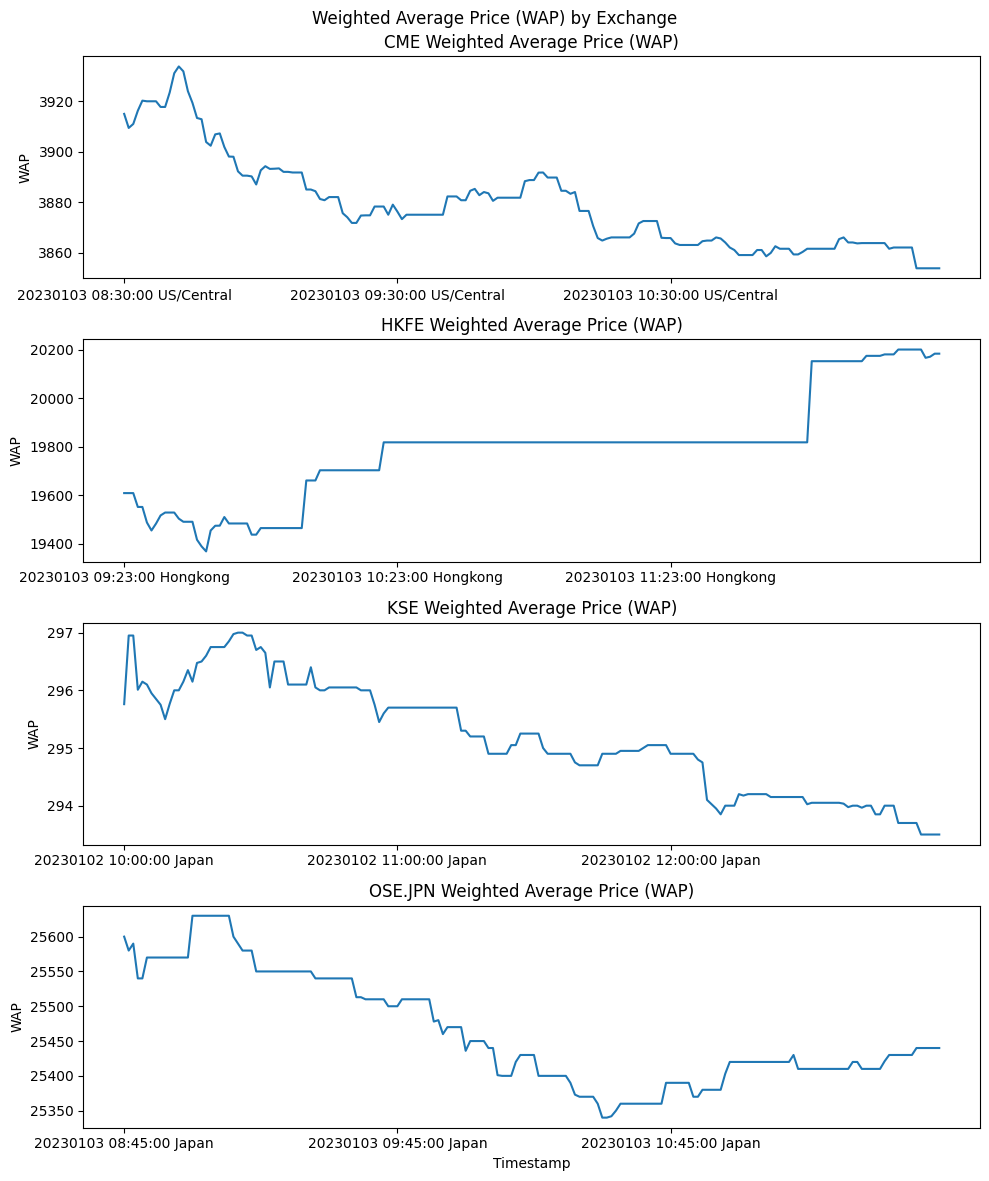

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for all four CSV files
file_paths = [
    "/Users/kmangutov/dev/steel3/data/202306_CME_ES_FUT_USD.csv",
    "/Users/kmangutov/dev/steel3/data/202306_HKFE_HSI_FUT_HKD.csv",
    "/Users/kmangutov/dev/steel3/data/202306_KSE_K200_FUT_KRW.csv",
    "/Users/kmangutov/dev/steel3/data/202306_OSE.JPN_N225_FUT_JPY.csv",
]

# Load the last 60 rows of each CSV file into pandas DataFrames and concatenate them into a single DataFrame
dfs = []
for file_path in file_paths:
    exchange = os.path.splitext(os.path.basename(file_path))[0].split("_")[1]
    df = pd.read_csv(file_path, parse_dates=["timestamp"], nrows=180)
    df["exchange"] = exchange
    dfs.append(df)
df = pd.concat(dfs)

# Create a separate subplot for each exchange
fig, axs = plt.subplots(nrows=4, sharex=False, sharey=False, figsize=(10, 12))

# Plot the 'wap' column for each exchange in its own subplot
for i, (exchange, exchange_df) in enumerate(df.groupby("exchange")):
    axs[i].plot(exchange_df["timestamp"], exchange_df["wap"])
    axs[i].set_title(f"{exchange} Weighted Average Price (WAP)")
    axs[i].set_ylabel("WAP")
    
    axs[i].set_xticks(exchange_df.iloc[::60].index)
    axs[i].set_xticklabels(exchange_df.iloc[::60]["timestamp"])
    

# Set the overall title and x-axis label
fig.suptitle("Weighted Average Price (WAP) by Exchange")
axs[-1].set_xlabel("Timestamp")

# Adjust the spacing between the subplots and show the plot
plt.tight_layout()
plt.show()
